In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

In [26]:

# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "test") \
    .getOrCreate()


In [27]:
df = spark.read.csv('SFY2018_Vendor_Payments.csv', header='true', inferSchema = True)

In [29]:
#we can use the columns attribute just like with pandas
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor
Vendor Number
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [30]:
print('The total number of rows is:', df.count(), '\nThe total number of columns is:', len(df.columns))

The total number of rows is: 146869 
The total number of columns is: 14


In [31]:
#show first 5 rows
df.show(5)

+--------------+--------------------+------+--------------------+-------------+-----------+-----+--------------------+----------+--------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|              Vendor|Vendor Number|       City|State|  DeptID Description|    DeptID|  Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+--------------------+-------------+-----------+-----+--------------------+----------+--------+--------------------+------+--------------------+-----+
|    09/30/2017|            Military|  2150|BGS Catamount Hea...|   0000270421| Montpelier|   VT|Air Services Cont...|2150020000|  255.86|Catamount Health ...|505700|Federal Revenue Fund|22005|
|    09/30/2017|Defender General'...|  2110|Law Office of Jui...|   0000354450|Island Pond|   VT|        PD Caledonia|2110001500|4,519.00|Contr Public Def&...|507210|        General Fund|10000|
|    09/30/2017|Forests, Parks

In [8]:
#show first row
df.head()

Row(Quarter Ending='09/30/2017', Department='Military', UnitNo=2150, Vendor='BGS Catamount Health Assessment', Vendor Number='0000270421', City='Montpelier', State='VT', DeptID Description='Air Services Contracts', DeptID='2150020000', Amount='255.86', Account='Catamount Health Assessment', AcctNo='505700', Fund Description='Federal Revenue Fund', Fund='22005')

In [9]:
df.describe().show()

+-------+--------------+--------------------+-----------------+-----------------+------------------+--------+------+--------------------+-------------------+-----------------+------------------+--------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|           UnitNo|           Vendor|     Vendor Number|    City| State|  DeptID Description|             DeptID|           Amount|           Account|              AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+-----------------+-----------------+------------------+--------+------+--------------------+-------------------+-----------------+------------------+--------------------+--------------------+--------------------+
|  count|        146869|              146869|           146869|           146869|            146869|  146869|146866|              146869|             146869|           146869|            146869|              146869|           

In [10]:
# start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    09/30/2017|            Military|   255.86|   VT|
|    09/30/2017|Defender General'...| 4,519.00|   VT|
|    09/30/2017|Forests, Parks & ...|    22.30|   VT|
|    09/30/2017|Agriculture, Food...|    55.07|   VT|
|    09/30/2017|       Public Safety|   704.00|   VT|
|    09/30/2017|                 Tax| 1,060.00|   VT|
|    09/30/2017|Disabilities Agin...|56,795.57|   VT|
|    09/30/2017|    Education Agency|   300.00|   VT|
|    09/30/2017|Transportation Ag...|    75.00|   VT|
|    09/30/2017|           Judiciary|    10.98|   MA|
+--------------+--------------------+---------+-----+



In [11]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    09/30/2017|            Military|   255.86|   VT|
|    09/30/2017|Defender General'...| 4,519.00|   VT|
|    09/30/2017|Forests, Parks & ...|    22.30|   VT|
|    09/30/2017|Agriculture, Food...|    55.07|   VT|
|    09/30/2017|       Public Safety|   704.00|   VT|
|    09/30/2017|                 Tax| 1,060.00|   VT|
|    09/30/2017|Disabilities Agin...|56,795.57|   VT|
|    09/30/2017|    Education Agency|   300.00|   VT|
|    09/30/2017|Transportation Ag...|    75.00|   VT|
|    09/30/2017|           Judiciary|    10.98|   MA|
+--------------+--------------------+---------+-----+
only showing top 10 rows



In [13]:
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Military'
LIMIT 10
'''
).show()

+--------------+----------+---------+-----+
|Quarter Ending|Department|   Amount|State|
+--------------+----------+---------+-----+
|    09/30/2017|  Military|   255.86|   VT|
|    09/30/2017|  Military|   250.00|   TX|
|    09/30/2017|  Military|   539.10|   VT|
|    09/30/2017|  Military|92,732.64|   CT|
|    09/30/2017|  Military|   462.20|   IL|
|    09/30/2017|  Military|     3.87|   VT|
|    09/30/2017|  Military| 1,172.99|   VT|
|    09/30/2017|  Military|    87.35|   VT|
|    09/30/2017|  Military|27,034.84|   PA|
|    09/30/2017|  Military| 2,061.38|   VT|
+--------------+----------+---------+-----+



In [14]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Military').show(10)

+--------------+----------+---------+-----+
|Quarter Ending|Department|   Amount|State|
+--------------+----------+---------+-----+
|    09/30/2017|  Military|   255.86|   VT|
|    09/30/2017|  Military|   250.00|   TX|
|    09/30/2017|  Military|   539.10|   VT|
|    09/30/2017|  Military|92,732.64|   CT|
|    09/30/2017|  Military|   462.20|   IL|
|    09/30/2017|  Military|     3.87|   VT|
|    09/30/2017|  Military| 1,172.99|   VT|
|    09/30/2017|  Military|    87.35|   VT|
|    09/30/2017|  Military|27,034.84|   PA|
|    09/30/2017|  Military| 2,061.38|   VT|
+--------------+----------+---------+-----+
only showing top 10 rows



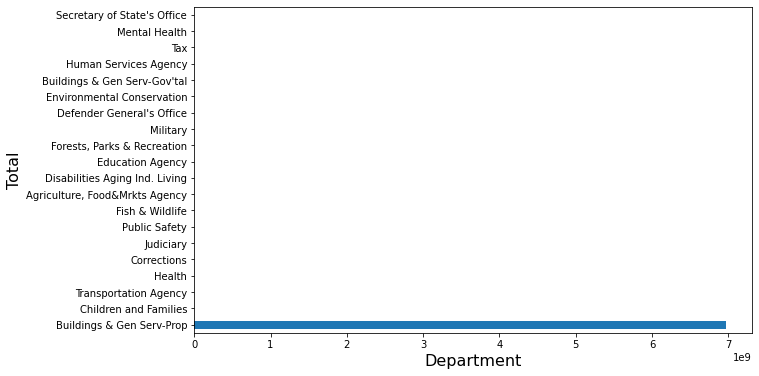

In [17]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 20
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


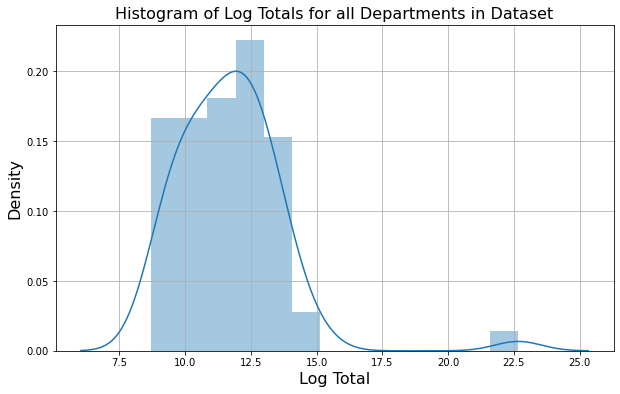

In [18]:

import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.grid()
plt.savefig('distplot.png')
plt.show()

In [19]:
df.select('State', 'Amount').show()

+-----+---------+
|State|   Amount|
+-----+---------+
|   VT|   255.86|
|   VT| 4,519.00|
|   VT|    22.30|
|   VT|    55.07|
|   VT|   704.00|
|   VT| 1,060.00|
|   VT|56,795.57|
|   VT|   300.00|
|   VT|    75.00|
|   MA|    10.98|
|   FL|   900.00|
|   VT|    11.33|
|   CA|   122.33|
|   PA|    31.33|
|   TX|   250.00|
|   MA|   462.56|
|   VT| 1,196.05|
|   VT|   213.47|
|   VT|34,337.49|
|   VT|    96.00|
+-----+---------+
only showing top 20 rows



In [20]:
plot_df2 = spark.sql(
'''
SELECT State, SUM(Amount) as Total FROM VermontVendor 
GROUP BY State
ORDER BY Total DESC
'''
).toPandas()
plot_df2.head()

,State,Total
0,VT,6.978645e+09
1,MA,1.107764e+06
2,NY,6.987738e+05
3,IL,5.123210e+05
4,PA,3.855255e+05


In [22]:
plot_df2 = spark.sql(
'''
SELECT `Quarter Ending` as Date, %s, SUM(Amount) as Total FROM VermontVendor 
GROUP BY State, Date
ORDER BY Total DESC
''' % 'State'
).toPandas()
plot_df2.head()

,Date,State,Total
0,03/31/2018,VT,3.485422e+09
1,06/30/2018,VT,2.324876e+09
2,12/31/2017,VT,1.164478e+09
3,09/30/2017,VT,3.868423e+06
4,09/30/2017,MA,3.229555e+05


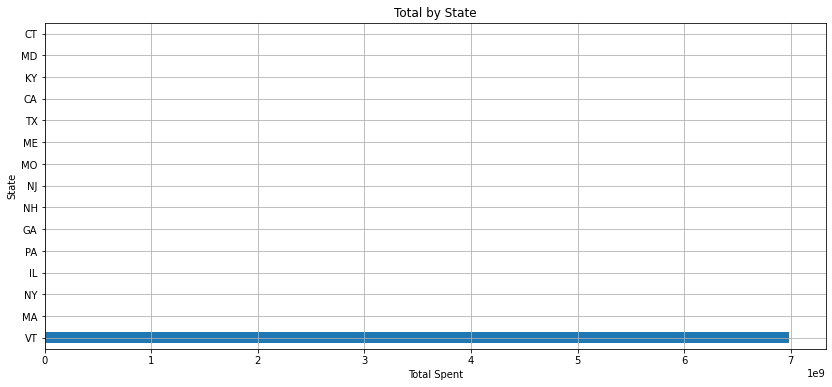

In [21]:
fig, ax = plt.subplots(1,1,figsize = (14, 6))
plot_df2.head(15).plot(x='State', y = 'Total', kind = 'barh', legend = False, ax = ax, color = 'C0')
plt.title('Total by State')
plt.ylabel('State')
plt.xlabel('Total Spent')
plt.grid()
plt.show()